In [123]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

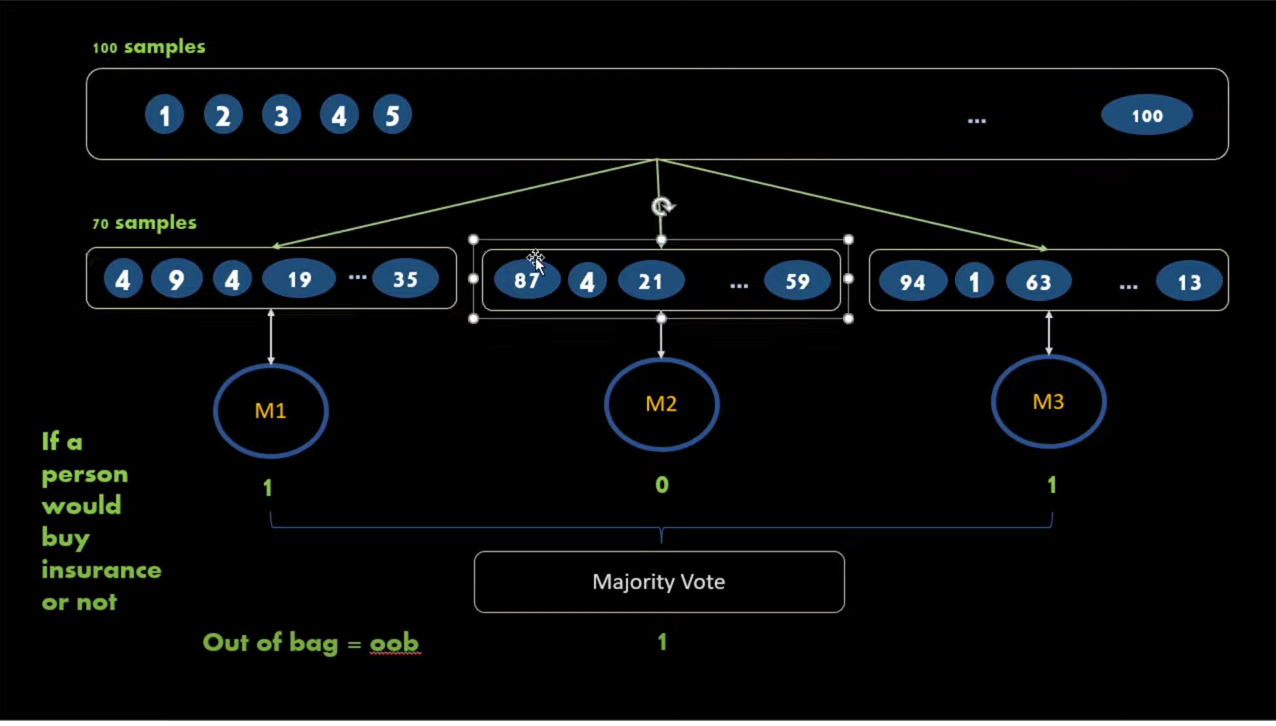


### Pima Indians Diabetes

In [124]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes/pima-indians-diabetes.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [125]:
df.columns  = ["pregnant", "glucose", "bloodpressure", "skinthickness ","serum_insulin","BMI","Diabetes_pedigree","Age","Outcome"]

In [126]:
df[df['Outcome'] == 1].sum()

pregnant              1304.000
glucose              37857.000
bloodpressure        18981.000
skinthickness         5940.000
serum_insulin        26890.000
BMI                   9418.200
Diabetes_pedigree      147.534
Age                   9934.000
Outcome                268.000
dtype: float64

In [127]:
df[df['Outcome'] == 0].sum()

pregnant              1649.000
glucose              54990.000
bloodpressure        34092.000
skinthickness         9832.000
serum_insulin        34396.000
BMI                  15152.100
Diabetes_pedigree      214.867
Age                  15595.000
Outcome                  0.000
dtype: float64

In [128]:
df.Outcome == 0

0      False
1       True
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766    False
767     True
Name: Outcome, Length: 768, dtype: bool

### Feature
* pregnant     - Number of times pregnant
*  glucose     - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* bloodpressure - Diastolic blood pressure (mm Hg)
* skinthickness - Triceps skin fold thickness (mm) (ความหนาของรอยพับของผิวหนัง)
* serum_insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* Diabetes_pedigree - Diabetes pedigree function
* Age
* Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [129]:
df

,pregnant,glucose,bloodpressure,skinthickness,serum_insulin,BMI,Diabetes_pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0, 0.5, 'Outcome')

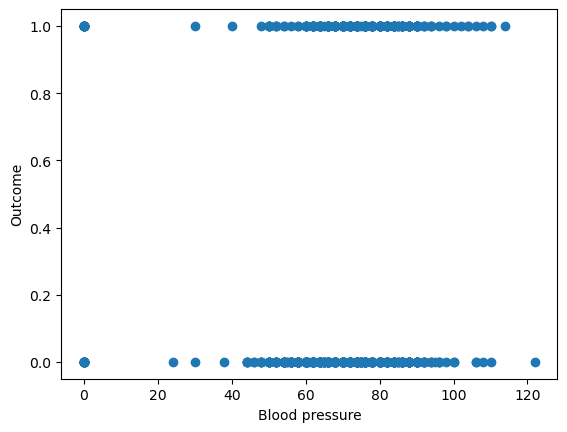

In [130]:
plt.scatter(df.bloodpressure,df.Outcome)
plt.xlabel('Blood pressure')
plt.ylabel('Outcome')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnant           768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   bloodpressure      768 non-null    int64  
 3   skinthickness      768 non-null    int64  
 4   serum_insulin      768 non-null    int64  
 5   BMI                768 non-null    float64
 6   Diabetes_pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
df.describe()

,pregnant,glucose,bloodpressure,skinthickness,serum_insulin,BMI,Diabetes_pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Number')

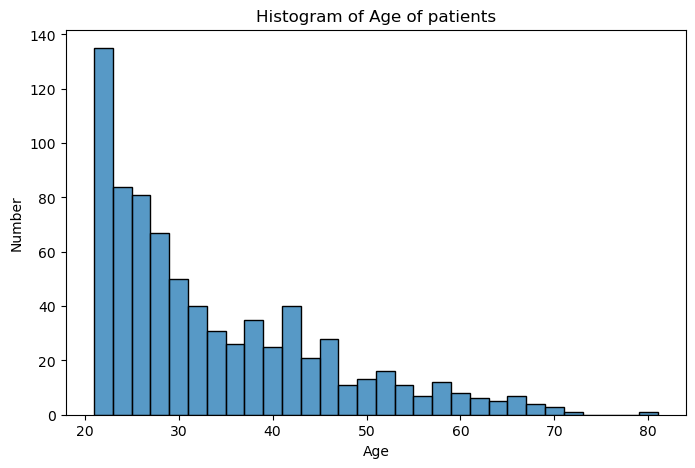

In [133]:
plt.figure(figsize=(8,5))
sns.histplot(x='Age', data=df, binwidth=2)
plt.title('Histogram of Age of patients')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

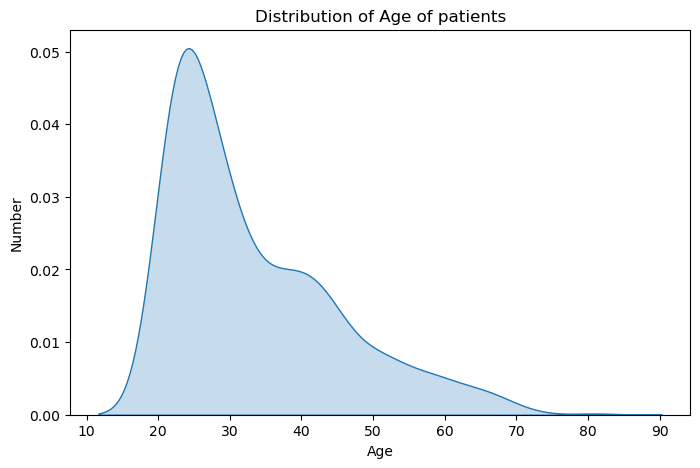

In [134]:
plt.figure(figsize=(8,5))

sns.kdeplot(x='Age', data=df,fill=True)
plt.title('Distribution of Age of patients')
plt.ylabel('Number')

In [135]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [136]:
268/500

0.536

In [137]:
X = df.drop('Outcome',axis = 'columns')
y = df.Outcome

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # ปรับ scale ค่า mean และ variance ของ X
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [140]:
y == 1  

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

In [141]:
y == 0

0      False
1       True
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766    False
767     True
Name: Outcome, Length: 768, dtype: bool

In [142]:
df[df['Outcome'] == 1].sum()

pregnant              1304.000
glucose              37857.000
bloodpressure        18981.000
skinthickness         5940.000
serum_insulin        26890.000
BMI                   9418.200
Diabetes_pedigree      147.534
Age                   9934.000
Outcome                268.000
dtype: float64

In [143]:
y_traindf = pd.DataFrame(y_train,columns = df['Outcome'])
y_traindf.count(0)

Outcome
1    0
0    0
1    0
0    0
1    0
    ..
0    0
0    0
0    0
1    0
0    0
Length: 768, dtype: int64

In [144]:
(y_test == 0).sum()

125

In [145]:
(y_test == 1).sum()

67

In [146]:
y_train

745    0
67     0
570    0
517    0
717    0
      ..
735    0
475    0
46     0
767    0
540    1
Name: Outcome, Length: 576, dtype: int64

In [147]:
len(X_test)

192

In [148]:
X_train.shape

(576, 8)

In [149]:
X_test.shape

(192, 8)

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv= 5)
scores

array([0.69480519, 0.63636364, 0.66883117, 0.75163399, 0.74509804])

In [151]:
scores.mean()

0.6993464052287581

In [152]:
from sklearn.ensemble import BaggingClassifier

bag_model =BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7534722222222222

In [153]:
from sklearn.ensemble import BaggingClassifier

bag_model =BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

scores = cross_val_score(bag_model, X, y, cv = 5)
scores

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [154]:
scores.mean()

0.7578728461081402

In [155]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.7539512774806892

### Feature description
1. อายุ: อายุของผู้ป่วย [ปี]
2. เพศ: เพศของผู้ป่วย [M: ชาย, F: หญิง]
3. ประเภทอาการเจ็บหน้าอก: ประเภทของอาการเจ็บหน้าอก [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. ความดันโลหิตในการพัก: ความดันโลหิตในการพัก [mm Hg]
5. คอเลสเตอรอลในเลือด: คอเลสเตอรอลในเลือด [mm/dl]
6. น้ำตาลในเลือดก่อนอาหาร: น้ำตาลในเลือดก่อนอาหาร [1: ถ้า FastingBS > 120 mg/dl, 0: มิฉะนั้น]
7. ผลการตรวจไฟฟ้าหัวใจในการพัก: ผลการตรวจไฟฟ้าหัวใจในการพัก [ปกติ: ปกติ, ST: แสดงความผิดปกติของคลื่น ST-T (การกลับค่า T wave และ/หรือการเพิ่มหรือลด ST elevation หรือ depression ของ> 0.05 mV), LVH: แสดงการหนาตัวของหลอดเลือดหัวใจซ้ายที่เป็นไปได้หรือแน่นอนตาม Estes 'criteria]
8. อัตราการเต้นของหัวใจสูงสุด: อัตราการเต้นของหัวใจสูงสุดที่เกิดขึ้น [ค่าตัวเลขระหว่าง 60 ถึง 202]
9. อัมพฤกษ์ที่เกิดขึ้นเนื่องจากการออกกำลังกาย: อัมพฤกษ์ที่เกิดขึ้นเนื่องจากการออกกำลังกาย [Y: ใช่, N: ไม่]
10. ค่า ST depression จากการออกกำลังกาย: ค่า ST depression จากการออกกำลังกาย 

In [156]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [157]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [158]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:ylabel='Cholesterol'>

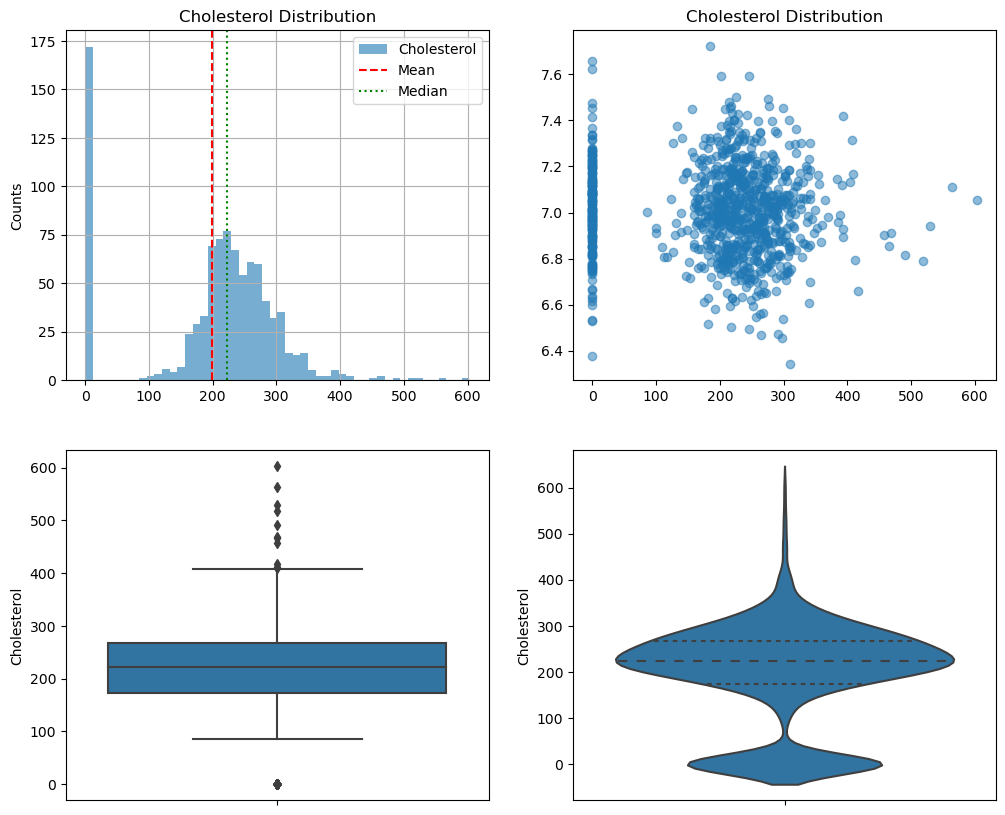

In [159]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Cholesterol'].hist(bins=50, label='Cholesterol', alpha=0.6)
plt.axvline(np.mean(df['Cholesterol']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Cholesterol']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Cholesterol Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Cholesterol'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Cholesterol Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="Cholesterol", data=df)

plt.subplot(2, 2, 4)
sns.violinplot(y="Cholesterol", data=df, inner="quartile", bw=0.2)

### Remove Outliers using z-score

In [160]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [161]:
z_score(df['Cholesterol'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 8 points


910

<AxesSubplot:ylabel='Oldpeak'>

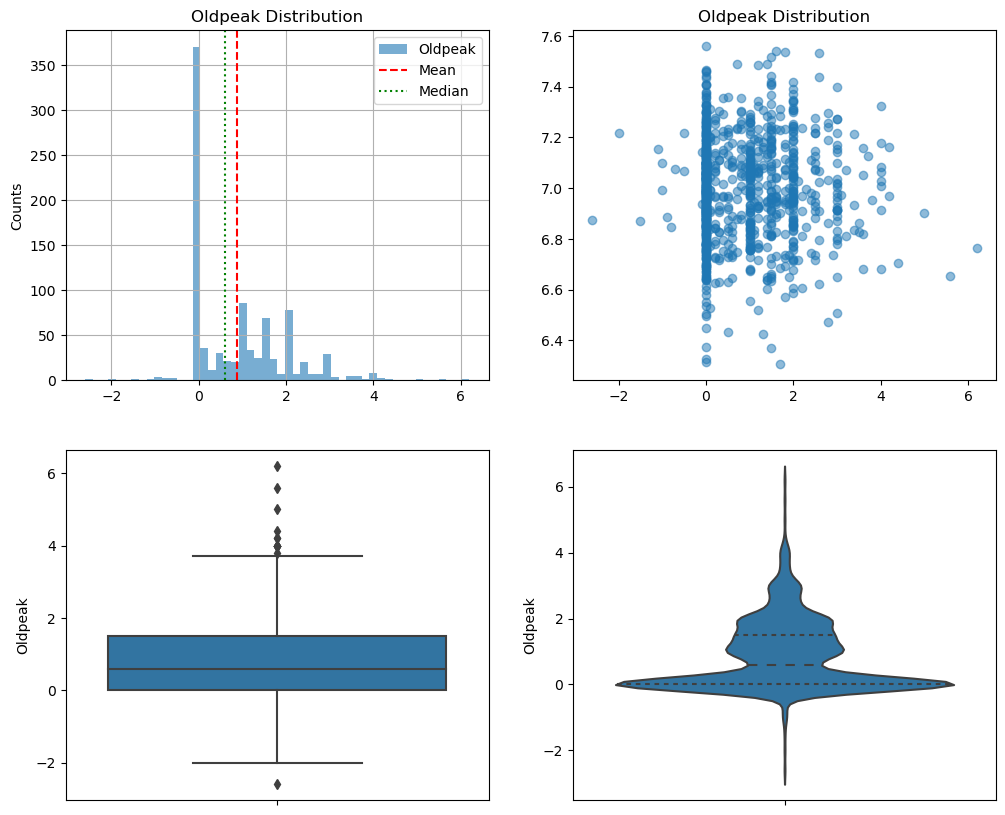

In [162]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Oldpeak'].hist(bins=50, label='Oldpeak', alpha=0.6)
plt.axvline(np.mean(df['Oldpeak']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Oldpeak']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Oldpeak Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Oldpeak'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Oldpeak Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="Oldpeak", data=df)

plt.subplot(2, 2, 4)
sns.violinplot(y="Oldpeak", data=df, inner="quartile", bw=0.2)